## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm

## Data Loading

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Histograms and Boxplots

In [5]:
def histo_boxplot(col: str, **kwargs):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3), dpi=120)
    ax1.hist(df[col], edgecolor="black", **kwargs)
    ax2 = sns.boxplot(df[col], orient='h')
    ax1.set_title(f"Histogram of {col}")
    ax2.set_title(f"Boxplot of {col}")
    plt.show()

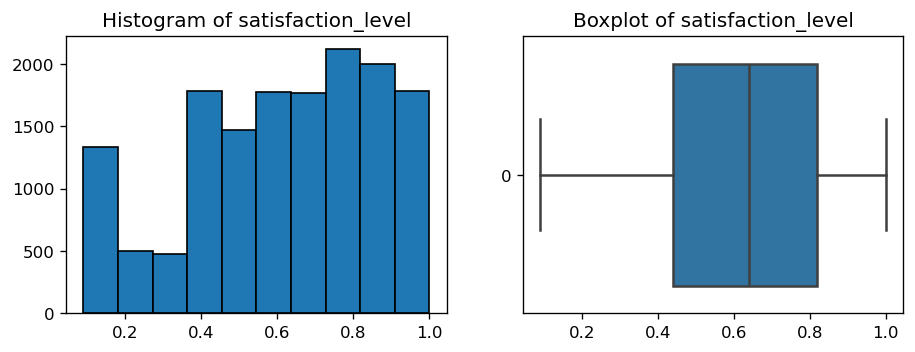

In [6]:
histo_boxplot("satisfaction_level")

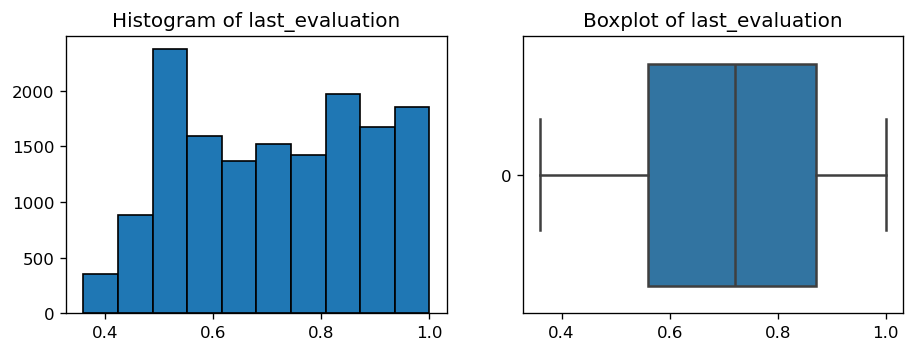

In [7]:
histo_boxplot("last_evaluation")

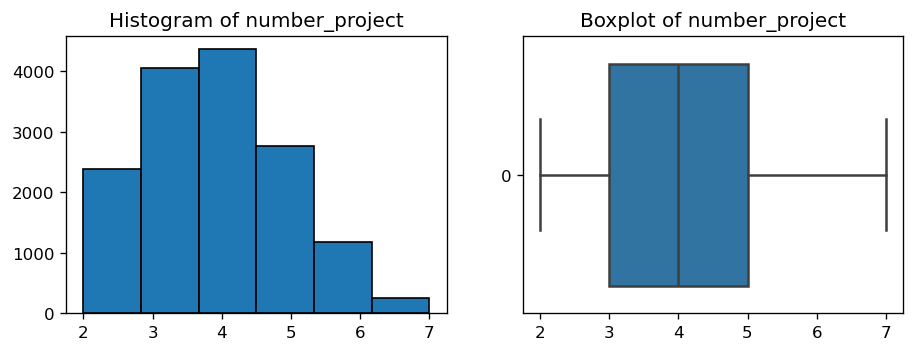

In [8]:
histo_boxplot("number_project", bins=6)

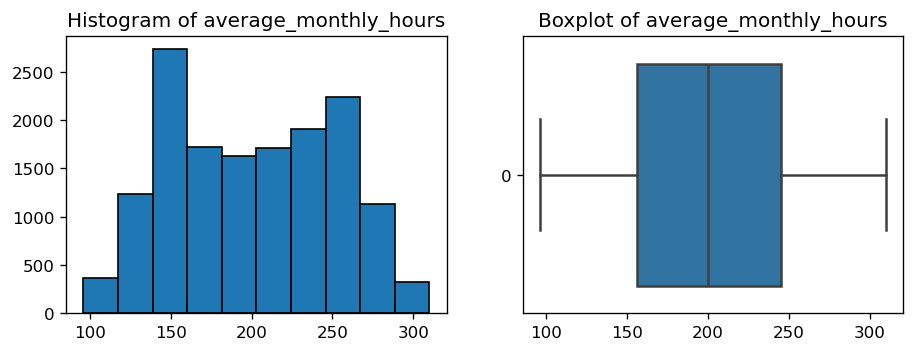

In [9]:
histo_boxplot("average_monthly_hours")

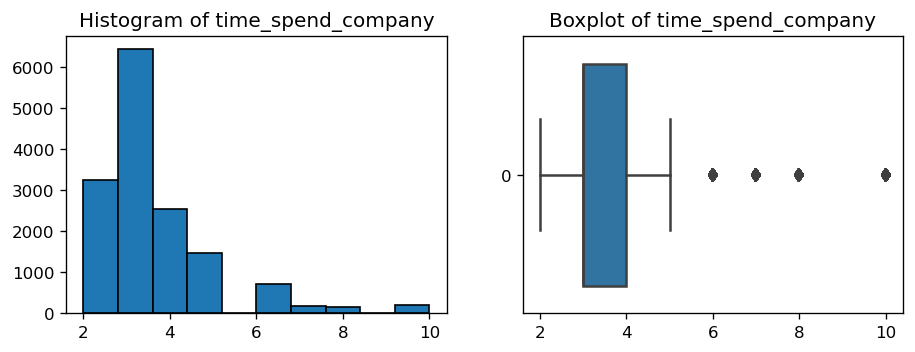

In [10]:
histo_boxplot("time_spend_company")

## Summary Statistics

In [11]:
cols = ["satisfaction_level", "last_evaluation", "number_project",
        "average_monthly_hours", "time_spend_company"]

df[cols].describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


## Outliers

In [12]:
def omit_outliers(col: str, remove: bool) -> pd.DataFrame:
    q1 = df["time_spend_company"].quantile(0.25)
    q3 = df["time_spend_company"].quantile(0.75)
    iqr = q3 - q1

    if remove:
        return df[(df[col] > q1 - 1.5 * iqr) & (df[col] < q3 + 1.5 * iqr)]
    else:
        return df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]

In [13]:
non_outlier_df = omit_outliers("time_spend_company", True)
outlier_df = omit_outliers("time_spend_company", False)

In [14]:
non_outlier_df[cols].describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
count,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000
mean,0.611729,0.714338,3.783116,200.592768,3.164686
std,0.248126,0.170571,1.243583,49.915380,0.908507
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,198.000000,3.000000
75%,0.810000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,5.000000


In [15]:
outlier_df[cols].describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
count,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000
mean,0.624657,0.734977,4.016381,205.946178,7.067083
std,0.253760,0.176406,1.085946,49.996684,1.478503
min,0.120000,0.360000,2.000000,97.000000,6.000000
25%,0.470000,0.600000,3.000000,164.000000,6.000000
50%,0.665000,0.760000,4.000000,215.000000,6.000000
75%,0.830000,0.890000,5.000000,248.000000,8.000000
max,1.000000,1.000000,6.000000,293.000000,10.000000


In [16]:
mean_1 = outlier_df[cols].describe().loc["mean"]
mean_2 = non_outlier_df[cols].describe().loc["mean"]
100 * (mean_1 / mean_2) - 100

satisfaction_level         2.113401
last_evaluation            2.889238
number_project             6.165944
average_monthly_hours      2.668795
time_spend_company       123.310696
Name: mean, dtype: float64

In [17]:
std_1 = outlier_df[cols].describe().loc["std"]
std_2 = non_outlier_df[cols].describe().loc["std"]
100 * (std_1 / std_2) - 100

satisfaction_level        2.270566
last_evaluation           3.420514
number_project          -12.676022
average_monthly_hours     0.162885
time_spend_company       62.739958
Name: std, dtype: float64

## Visualizations

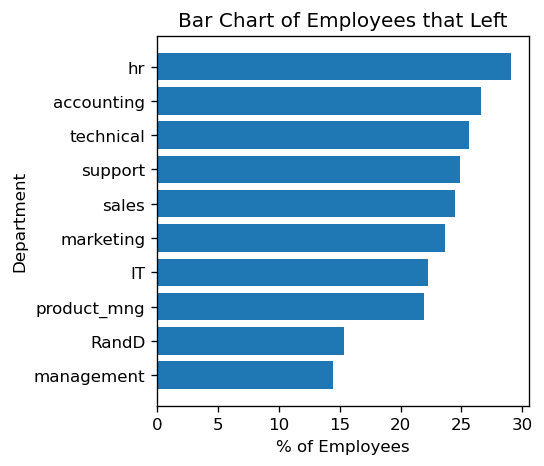

In [18]:
cols = ["Department", "left"]
temp_df = df[cols].groupby("Department").mean().sort_values("left") * 100

fig, ax = plt.subplots(figsize=(4, 4), dpi=120)
ax.barh(y=temp_df.index, width=temp_df["left"])
plt.xlabel("% of Employees")
plt.ylabel("Department")
plt.title("Bar Chart of Employees that Left")
plt.show()

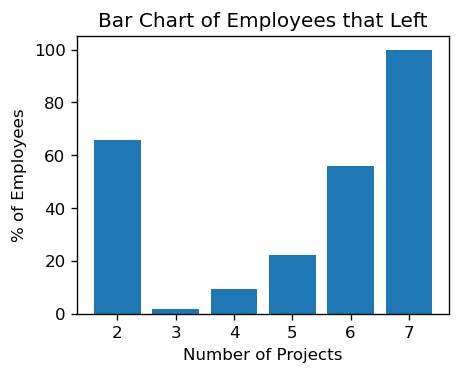

In [19]:
cols = ["number_project", "left"]
temp_df = df[cols].groupby("number_project").mean() * 100

fig, ax = plt.subplots(figsize=(4, 3), dpi=120)
ax.bar(x=temp_df.index, height=temp_df["left"])
plt.xlabel("Number of Projects")
plt.ylabel("% of Employees")
plt.title("Bar Chart of Employees that Left")
plt.show()